# <span style="display:block;text-align:center;padding:15px;background-color:#00509e;color:#ffffff;border-radius:10px;font-size:150%;">📈 LSTM 🔮</span>


## <b><span style='color:#8bb7cf'>1 | </span><span style='color:#00369c'>Premier modèle</span></b>  

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Charger le jeu de données
data = pd.read_csv("/kaggle/input/train-seisme/data_TRAIN_clean_feature_engineering.csv")
data.drop(columns="Unnamed: 0", inplace=True)

# Charger le jeu de données
data_test = pd.read_csv("/kaggle/input/train-seisme/data_TEST_clean_feature_engineering.csv")
data_test.drop(columns="Unnamed: 0", inplace=True)

df = pd.concat([data,data_test])


# Sélectionner la variable cible
y = df["Count"].values

# Normalisation des données
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Créer des séquences pour l'entraînement du modèle
window_size = 12
X, y = [], []

for i in range(len(y_scaled) - window_size):
    X.append(y_scaled[i:i+window_size])
    y.append(y_scaled[i+window_size])

X, y = np.array(X), np.array(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, y_train = X[:-window_size], y[:-window_size]
X_test, y_test = X[-window_size:], y[-window_size:]

# Reshape pour tenir compte de la structure d'entrée de LSTM
X_train = X_train.reshape((X_train.shape[0], window_size, 1))
X_test = X_test.reshape((X_test.shape[0], window_size, 1))

# Modèle LSTM
model = Sequential()
model.add(LSTM(units=50,  input_shape=(window_size, 1)))
model.add(Dense(units=1))

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Faire des prédictions
predictions_scaled = model.predict(X_test)

# Inverser la normalisation pour obtenir les valeurs réelles
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

#Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions,0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

Epoch 1/50
12/12 [==============================] - 2s 6ms/step - loss: 0.0104
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 9/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 10/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 11/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 12/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 13/50
12/12 [==============================

In [4]:
X_test

array([[[0.18301314],
        [0.12032356],
        [0.11830131],
        [0.07280081],
        [0.1132457 ],
        [0.21941355],
        [0.14054601],
        [0.10010111],
        [0.09100101],
        [0.10819009],
        [0.07785642],
        [0.11021234]],

       [[0.12032356],
        [0.11830131],
        [0.07280081],
        [0.1132457 ],
        [0.21941355],
        [0.14054601],
        [0.10010111],
        [0.09100101],
        [0.10819009],
        [0.07785642],
        [0.11021234],
        [0.10212336]],

       [[0.11830131],
        [0.07280081],
        [0.1132457 ],
        [0.21941355],
        [0.14054601],
        [0.10010111],
        [0.09100101],
        [0.10819009],
        [0.07785642],
        [0.11021234],
        [0.10212336],
        [0.08695652]],

       [[0.07280081],
        [0.1132457 ],
        [0.21941355],
        [0.14054601],
        [0.10010111],
        [0.09100101],
        [0.10819009],
        [0.07785642],
        [0.11021234],
    

In [6]:
y_scaled

array([0.02325581, 0.        , 0.03437816, 0.01112235, 0.01213347,
       0.01718908, 0.02123357, 0.01314459, 0.00505561, 0.00303337,
       0.03235592, 0.01516684, 0.0182002 , 0.02123357, 0.01718908,
       0.02022245, 0.02628918, 0.0182002 , 0.02123357, 0.01617796,
       0.00707786, 0.02527806, 0.01415571, 0.00707786, 0.0182002 ,
       0.00707786, 0.01415571, 0.00707786, 0.01011122, 0.02325581,
       0.00808898, 0.0091001 , 0.02426694, 0.0364004 , 0.02022245,
       0.00505561, 0.00808898, 0.0273003 , 0.02628918, 0.02527806,
       0.04448938, 0.01011122, 0.02932255, 0.02426694, 0.02527806,
       0.01617796, 0.02123357, 0.02022245, 0.01718908, 0.01112235,
       0.02224469, 0.01314459, 0.00808898, 0.00202224, 0.02123357,
       0.02022245, 0.02224469, 0.01718908, 0.02628918, 0.01718908,
       0.02932255, 0.01314459, 0.0273003 , 0.03235592, 0.02426694,
       0.01921132, 0.02527806, 0.02325581, 0.02022245, 0.06167846,
       0.03235592, 0.02831143, 0.02123357, 0.02224469, 0.08897

12/12 [==============================] - 0s 4ms/step


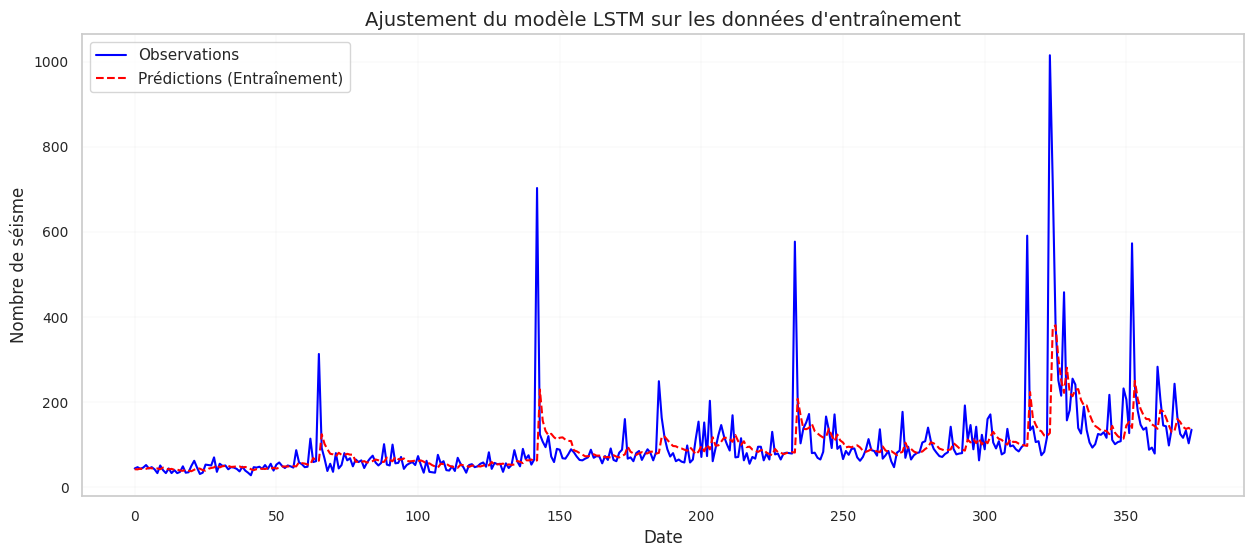

In [465]:
# Prédire avec le modèle sur les données d'entraînement
predicted_values_train = model.predict(X_train)

# Inverser la normalisation pour obtenir les prédictions réelles
predicted_values_train = scaler.inverse_transform(predicted_values_train.reshape(-1, 1))
y_original = scaler.inverse_transform(y_train.reshape(-1, 1))

# Convertir les données en DataFrame
df_train = pd.DataFrame({'Date': range(len(y_original)), 'Observations': y_original.flatten(), 'Predictions': predicted_values_train.flatten()})

# Tracer l'ajustement du modèle avec Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Observations', data=df_train, label='Observations', color='blue')
sns.lineplot(x='Date', y='Predictions', data=df_train, label='Prédictions (Entraînement)', color='red', linestyle='dashed')
plt.title('Ajustement du modèle LSTM sur les données d\'entraînement')
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.legend()
plt.savefig('ajustement_modele_lstm.png')
plt.show()

In [466]:
X_test

array([[[0.18301314],
        [0.12032356],
        [0.11830131],
        [0.07280081],
        [0.1132457 ],
        [0.21941355],
        [0.14054601],
        [0.10010111],
        [0.09100101],
        [0.10819009],
        [0.07785642],
        [0.11021234]],

       [[0.12032356],
        [0.11830131],
        [0.07280081],
        [0.1132457 ],
        [0.21941355],
        [0.14054601],
        [0.10010111],
        [0.09100101],
        [0.10819009],
        [0.07785642],
        [0.11021234],
        [0.10212336]],

       [[0.11830131],
        [0.07280081],
        [0.1132457 ],
        [0.21941355],
        [0.14054601],
        [0.10010111],
        [0.09100101],
        [0.10819009],
        [0.07785642],
        [0.11021234],
        [0.10212336],
        [0.08695652]],

       [[0.07280081],
        [0.1132457 ],
        [0.21941355],
        [0.14054601],
        [0.10010111],
        [0.09100101],
        [0.10819009],
        [0.07785642],
        [0.11021234],
    

In [441]:
y_test

array([0.10212336, 0.08695652, 0.12942366, 0.08088979, 0.08897877,
       0.09605662, 0.10515672, 0.10920121, 0.0768453 , 0.0950455 ,
       0.11122346, 0.08998989])

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Calculer les prédictions du modèle sur l'ensemble de test
predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

#Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions,0)

# Calculer le RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE sur les données de test :", round(rmse,2))

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculer le MSE
mse = mean_squared_error(y_test_actual, predictions)
print("MSE sur les données de test :", round(mse,2))

# Calculer le MAE
mae = mean_absolute_error(y_test_actual, predictions)
print("MAE sur les données de test :", round(mae,2))

# Calculer le MAPE
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
print("MAPE sur les données de test :", round(mape,2),"%")

1/1 [==============================] - 0s 25ms/step
RMSE sur les données de test : 16.42
MSE sur les données de test : 269.5
MAE sur les données de test : 13.83
MAPE sur les données de test : 11.58 %


In [462]:
y_test_actual

array([127., 112., 154., 106., 114., 121., 130., 134., 102., 120., 136.,
       115.])

In [463]:
predictions

array([133., 130., 126., 133., 126., 124., 120., 121., 123., 117., 118.,
       123.], dtype=float32)

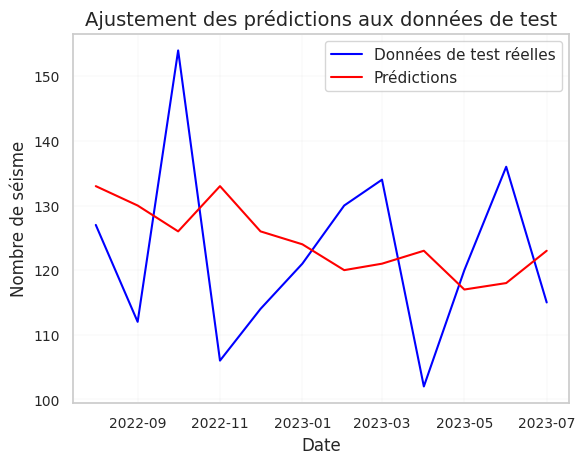

In [464]:
import matplotlib.pyplot as plt

data_test['year_month'] = pd.to_datetime(data_test['year_month'])


# Utiliser un style personnalisé pour ressembler à Plotly
sns.set_theme(style="whitegrid", rc={"grid.linewidth": 0.1, 'axes.labelsize': 12, 'axes.titlesize': 14, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

# Tracer les données de test réelles
plt.plot(data_test["year_month"], y_test_actual, label='Données de test réelles', color='blue')

# Tracer les prédictions
plt.plot(data_test["year_month"], predictions, label='Prédictions', color='red')

# Ajouter des labels et une légende
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.title('Ajustement des prédictions aux données de test')
plt.savefig('ajustement_modele_lstm_test.png')
plt.legend()

# Afficher le graphique
plt.show()

## <b><span style='color:#8bb7cf'>2 | </span><span style='color:#00369c'>Monte-Carlo</span></b>  

In [12]:
mape1 = 9.62
for i in range(20):
    print("------------------")
    print(f"{i}")
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout, GaussianNoise
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error


    # Charger le jeu de données
    data = pd.read_csv("/kaggle/input/train-seisme/data_TRAIN_clean_feature_engineering.csv")
    data.drop(columns="Unnamed: 0", inplace=True)

    # Charger le jeu de données
    data_test = pd.read_csv("/kaggle/input/train-seisme/data_TEST_clean_feature_engineering.csv")
    data_test.drop(columns="Unnamed: 0", inplace=True)

    df = pd.concat([data,data_test])


    # Sélectionner la variable cible
    y = df["Count"].values

    # Normalisation des données
    scaler = MinMaxScaler()
    y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

    # Créer des séquences pour l'entraînement du modèle
    window_size = 12
    X, y = [], []

    for i in range(len(y_scaled) - window_size):
        X.append(y_scaled[i:i+window_size])
        y.append(y_scaled[i+window_size])

    X, y = np.array(X), np.array(y)

    # Diviser les données en ensembles d'entraînement et de test
    X_train, y_train = X[:-window_size], y[:-window_size]
    X_test, y_test = X[-window_size:], y[-window_size:]

    # Reshape pour tenir compte de la structure d'entrée de LSTM
    X_train = X_train.reshape((X_train.shape[0], window_size, 1))
    X_test = X_test.reshape((X_test.shape[0], window_size, 1))

    # Modèle LSTM
    model = Sequential()
    model.add(LSTM(units=200, return_sequences=True, input_shape=(window_size, 1)))
    
    model.add(LSTM(units=150, return_sequences=True))
    model.add(Dropout(0.25))
    
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=50))
    model.add(Dropout(0.15))
    
    model.add(Dense(units=1))

    # Compiler le modèle
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entraîner le modèle
    model.fit(X_train, y_train, epochs=50, batch_size=32,verbose=0)

    
    # Calculer les prédictions du modèle sur l'ensemble de test
    predictions_scaled = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

    #Arrondir à l'entier car on traite des nombres
    predictions = np.round(predictions).astype(int)
    
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    # Calculer le RMSE
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    print("RMSE sur les données de test :", round(rmse,2))

    

    # Calculer le MSE
    mse = mean_squared_error(y_test_actual, predictions)
    print("MSE sur les données de test :", round(mse,2))

    # Calculer le MAE
    mae = mean_absolute_error(y_test_actual, predictions)
    print("MAE sur les données de test :", round(mae,2))

    # Calculer le MAPE
    mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
    print("MAPE sur les données de test :", round(mape,2),"%")
    
    if mape < mape1:
        mape1 = mape
        #Sauvegarder le modèle
        # Spécifier le chemin où vous souhaitez enregistrer le modèle
        model_save_path = '/kaggle/working/lstm/LSTM.h5'

        # Enregistrer le modèle
        model.save(model_save_path)

        # Afficher un message de confirmation
        print(f"Le modèle a été enregistré avec succès à l'emplacement : {model_save_path}")

------------------
0
1/1 [==============================] - 2s 2s/step
RMSE sur les données de test : 17.59
MSE sur les données de test : 309.33
MAE sur les données de test : 15.17
MAPE sur les données de test : 13.04 %
------------------
1
1/1 [==============================] - 2s 2s/step
RMSE sur les données de test : 14.66
MSE sur les données de test : 214.83
MAE sur les données de test : 11.67
MAPE sur les données de test : 9.34 %
Le modèle a été enregistré avec succès à l'emplacement : /kaggle/working/lstm/LSTM.h5
------------------
2


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step
RMSE sur les données de test : 15.16
MSE sur les données de test : 229.83
MAE sur les données de test : 12.17
MAPE sur les données de test : 9.81 %
------------------
3
1/1 [==============================] - 2s 2s/step
RMSE sur les données de test : 14.86
MSE sur les données de test : 220.92
MAE sur les données de test : 12.08
MAPE sur les données de test : 9.72 %
------------------
4
1/1 [==============================] - 2s 2s/step
RMSE sur les données de test : 17.98
MSE sur les données de test : 323.42
MAE sur les données de test : 15.58
MAPE sur les données de test : 13.39 %
------------------
5
1/1 [==============================] - 2s 2s/step
RMSE sur les données de test : 24.09
MSE sur les données de test : 580.33
MAE sur les données de test : 20.33
MAPE sur les données de test : 17.81 %
------------------
6
1/1 [==============================] - 2s 2s/step
RMSE sur les données de test : 16.67
MSE sur les données de test : 278.0

In [420]:
#Importer le modèle avec les meilleurs performances
from tensorflow.keras.models import load_model

# Charger le modèle
loaded_model = load_model("/kaggle/working/lstm/LSTM.h5")

In [422]:
# Calculer les prédictions du modèle sur l'ensemble de test
predictions_scaled = loaded_model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

#Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions).astype(int)

# Calculer le RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE sur les données de test :", round(rmse,2))

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculer le MSE
mse = mean_squared_error(y_test_actual, predictions)
print("MSE sur les données de test :", round(mse,2))

# Calculer le MAE
mae = mean_absolute_error(y_test_actual, predictions)
print("MAE sur les données de test :", round(mae,2))

# Calculer le MAPE
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
print("MAPE sur les données de test :", round(mape,2),"%")
    

1/1 [==============================] - 0s 40ms/step
RMSE sur les données de test : 15.28
MSE sur les données de test : 233.5
MAE sur les données de test : 12.17
MAPE sur les données de test : 9.67 %


12/12 [==============================] - 0s 20ms/step


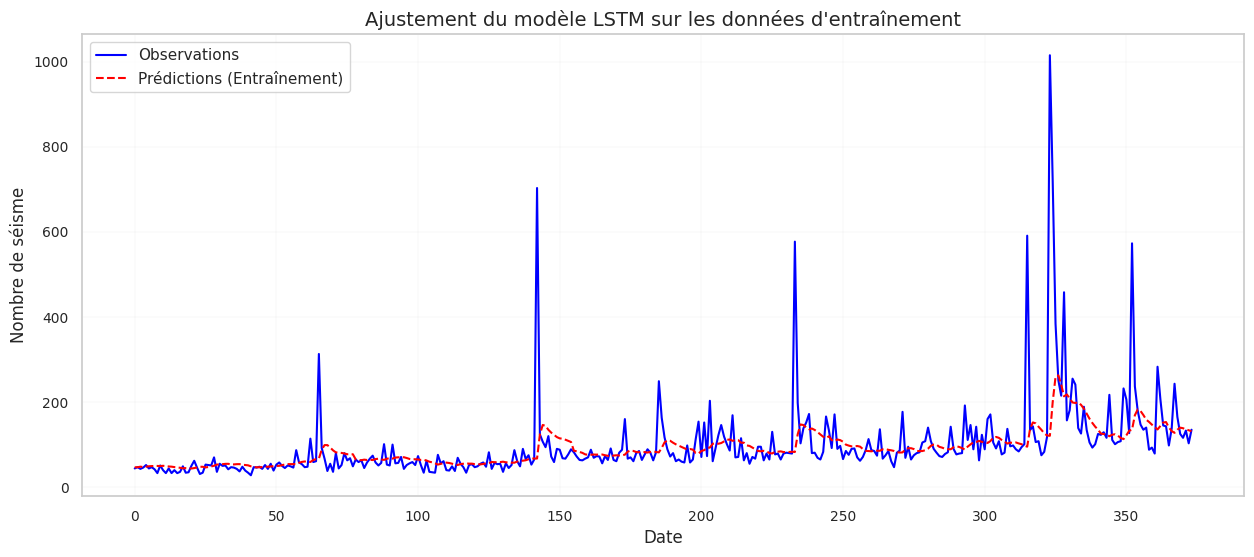

In [425]:
# Prédire avec le modèle sur les données d'entraînement
predicted_values_train = loaded_model.predict(X_train)

# Inverser la normalisation pour obtenir les prédictions réelles
predicted_values_train = scaler.inverse_transform(predicted_values_train.reshape(-1, 1))
y_original = scaler.inverse_transform(y_train.reshape(-1, 1))

# Convertir les données en DataFrame
df_train = pd.DataFrame({'Date': range(len(y_original)), 'Observations': y_original.flatten(), 'Predictions': predicted_values_train.flatten()})

# Tracer l'ajustement du modèle avec Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Observations', data=df_train, label='Observations', color='blue')
sns.lineplot(x='Date', y='Predictions', data=df_train, label='Prédictions (Entraînement)', color='red', linestyle='dashed')
plt.title('Ajustement du modèle LSTM sur les données d\'entraînement')
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.legend()
plt.savefig('ajustement_modele_lstm_optimal.png')
plt.show()

1/1 [==============================] - 0s 32ms/step


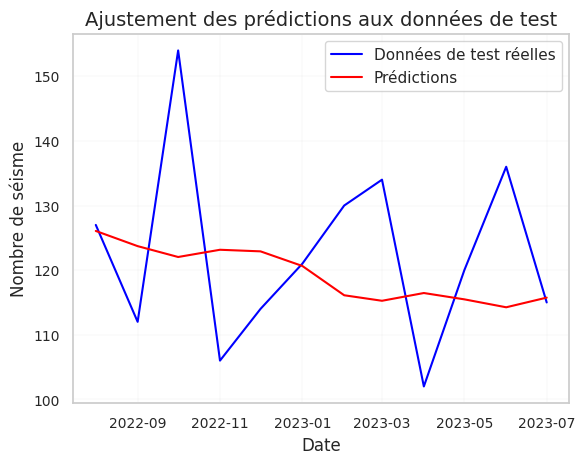

In [428]:
import matplotlib.pyplot as plt

data_test['year_month'] = pd.to_datetime(data_test['year_month'])


# Calculer les prédictions du modèle sur l'ensemble de test
predictions_scaled = loaded_model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

#Arrondir à l'entier car on traite des nombres
# predictions = np.round(predictions).astype(int)

# Utiliser un style personnalisé pour ressembler à Plotly
sns.set_theme(style="whitegrid", rc={"grid.linewidth": 0.1, 'axes.labelsize': 12, 'axes.titlesize': 14, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

# Tracer les données de test réelles
plt.plot(data_test["year_month"], y_test_actual, label='Données de test réelles', color='blue')

# Tracer les prédictions
plt.plot(data_test["year_month"], predictions, label='Prédictions', color='red')

# Ajouter des labels et une légende
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.title('Ajustement des prédictions aux données de test')
plt.savefig('ajustement_test_modele_lstm_optimal.png')
plt.legend()

# Afficher le graphique
plt.show()

In [429]:
# Afficher le résumé du modèle
loaded_model.summary()

Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_363 (LSTM)             (None, 12, 50)            10400     
                                                                 
 lstm_364 (LSTM)             (None, 12, 200)           200800    
                                                                 
 dropout_259 (Dropout)       (None, 12, 200)           0         
                                                                 
 lstm_365 (LSTM)             (None, 12, 150)           210600    
                                                                 
 dropout_260 (Dropout)       (None, 12, 150)           0         
                                                                 
 lstm_366 (LSTM)             (None, 100)               100400    
                                                                 
 dropout_261 (Dropout)       (None, 100)            

In [468]:
X_test

array([[0.18301314, 0.12032356, 0.11830131, 0.07280081, 0.1132457 ,
        0.21941355, 0.14054601, 0.10010111, 0.09100101, 0.10819009,
        0.07785642, 0.11021234],
       [0.12032356, 0.11830131, 0.07280081, 0.1132457 , 0.21941355,
        0.14054601, 0.10010111, 0.09100101, 0.10819009, 0.07785642,
        0.11021234, 0.10212336],
       [0.11830131, 0.07280081, 0.1132457 , 0.21941355, 0.14054601,
        0.10010111, 0.09100101, 0.10819009, 0.07785642, 0.11021234,
        0.10212336, 0.08695652],
       [0.07280081, 0.1132457 , 0.21941355, 0.14054601, 0.10010111,
        0.09100101, 0.10819009, 0.07785642, 0.11021234, 0.10212336,
        0.08695652, 0.12942366],
       [0.1132457 , 0.21941355, 0.14054601, 0.10010111, 0.09100101,
        0.10819009, 0.07785642, 0.11021234, 0.10212336, 0.08695652,
        0.12942366, 0.08088979],
       [0.21941355, 0.14054601, 0.10010111, 0.09100101, 0.10819009,
        0.07785642, 0.11021234, 0.10212336, 0.08695652, 0.12942366,
        0.08088979,

# <span style="display:block;text-align:center;padding:15px;background-color:#00509e;color:#ffffff;border-radius:10px;font-size:150%;">⏳ LightGBM 🚀</span>

## <b><span style='color:#8bb7cf'>1 | </span><span style='color:#00369c'>Premier modèle</span></b> 

In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Charger le jeu de données
data = pd.read_csv("/kaggle/input/train-seisme/data_TRAIN_clean_feature_engineering.csv")
data.drop(columns="Unnamed: 0", inplace=True)

# Charger le jeu de données
data_test = pd.read_csv("/kaggle/input/train-seisme/data_TEST_clean_feature_engineering.csv")
data_test.drop(columns="Unnamed: 0", inplace=True)

df = pd.concat([data, data_test])

# Sélectionner la variable cible
y = df["Count"].values

# Normalisation des données
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Créer des séquences pour l'entraînement du modèle
window_size = 12
X, y = [], []

for i in range(len(y_scaled) - window_size):
    X.append(y_scaled[i:i+window_size])
    y.append(y_scaled[i+window_size])

X, y = np.array(X), np.array(y)

# Utiliser les 12 dernières valeurs comme ensemble de test
X_train, y_train = X[:-window_size], y[:-window_size]
X_test, y_test = X[-window_size:], y[-window_size:]

# Entraîner le modèle LightGBM
params = {
}

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[train_data, valid_data], early_stopping_rounds=20, verbose_eval=10)

# Faire des prédictions
predictions_scaled = bst.predict(X_test, num_iteration=bst.best_iteration)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions, 0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

# Calculer et afficher la RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE:", rmse)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 374, number of used features: 12
[LightGBM] [Info] Start training from score 0.072455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [9]:
X_test

array([[0.18301314, 0.12032356, 0.11830131, 0.07280081, 0.1132457 ,
        0.21941355, 0.14054601, 0.10010111, 0.09100101, 0.10819009,
        0.07785642, 0.11021234],
       [0.12032356, 0.11830131, 0.07280081, 0.1132457 , 0.21941355,
        0.14054601, 0.10010111, 0.09100101, 0.10819009, 0.07785642,
        0.11021234, 0.10212336],
       [0.11830131, 0.07280081, 0.1132457 , 0.21941355, 0.14054601,
        0.10010111, 0.09100101, 0.10819009, 0.07785642, 0.11021234,
        0.10212336, 0.08695652],
       [0.07280081, 0.1132457 , 0.21941355, 0.14054601, 0.10010111,
        0.09100101, 0.10819009, 0.07785642, 0.11021234, 0.10212336,
        0.08695652, 0.12942366],
       [0.1132457 , 0.21941355, 0.14054601, 0.10010111, 0.09100101,
        0.10819009, 0.07785642, 0.11021234, 0.10212336, 0.08695652,
        0.12942366, 0.08088979],
       [0.21941355, 0.14054601, 0.10010111, 0.09100101, 0.10819009,
        0.07785642, 0.11021234, 0.10212336, 0.08695652, 0.12942366,
        0.08088979,

## <b><span style='color:#8bb7cf'>2 | </span><span style='color:#00369c'>Méthode de tuning</span></b>  

### <b><span style='color:#8bb7cf'>2.1 | </span><span style='color:#00369c'>RandomSearchCV</span></b>  

In [31]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

# Définir l'espace des hyperparamètres à explorer
param_space = {
    'num_leaves': [i for i in range(20, 50, 5)],
    'learning_rate': np.arange(0.01, 0.2, 0.05),
    'n_estimators': [i for i in range(50, 300, 50)],
}

# Initialiser le modèle LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', boosting_type='gbdt')

# Utiliser TimeSeriesSplit pour la validation croisée
tscv = TimeSeriesSplit(n_splits=5)

# Initialiser RandomSearchCV
random_search = RandomizedSearchCV(
    lgb_model,
    param_space,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

# Effectuer la recherche aléatoire
random_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres: {'num_leaves': 35, 'n_estimators': 50, 'learning_rate': 0.11}


In [32]:
random_search.best_params_["num_leaves"]

35

In [34]:
# Entraîner le modèle LightGBM
# Définir l'espace des hyperparamètres à explorer
param_space = {
    'num_leaves': random_search.best_params_["num_leaves"],
    'learning_rate': random_search.best_params_["learning_rate"],
    'n_estimators': random_search.best_params_["n_estimators"],
}


train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

num_round = 1000
bst = lgb.train(param_space, train_data, num_round, valid_sets=[train_data, valid_data], early_stopping_rounds=20, verbose_eval=10)

# Faire des prédictions
predictions_scaled = bst.predict(X_test, num_iteration=bst.best_iteration)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions, 0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

# Calculer et afficher la RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE:", rmse)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 374, number of used features: 12
[LightGBM] [Info] Start training from score 0.072455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


### <b><span style='color:#8bb7cf'>2.2 | </span><span style='color:#00369c'>Méthode bayésienne</span></b>  

In [41]:
import numpy as np
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, Trials
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fonction objective
def objective(params):
    num_leaves = int(params['num_leaves'])
    n_estimators = int(params['n_estimators'])
    learning_rate = float(params['learning_rate'])

    model = lgb.LGBMRegressor(
        objective='regression',
        metric='rmse',
        boosting_type='gbdt',
        num_leaves=num_leaves,
        n_estimators=n_estimators,
        learning_rate=learning_rate
    )

    model.fit(X_train, y_train)

    predictions_scaled = model.predict(X_test, num_iteration=model.best_iteration_)
    predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    return rmse

# Optimisation à l'aide de l'optimisation bayésienne
def optimize(trial):
    params = {
        'num_leaves': hp.uniform('num_leaves', 20,50),
        'n_estimators': hp.uniform('n_estimators', 50,300),
        'learning_rate': hp.uniform('learning_rate', 0.01, 0.1)
    }

    best = fmin(fn=objective, space=params, algo=tpe.suggest, trials=trial, max_evals=100)
    return best

# Mise en place du processus
trial = Trials()
best = optimize(trial)
print("Best Hyperparameters:", best)

100%|██████████| 100/100 [00:47<00:00,  2.12trial/s, best loss: 78.4576651193027]
Best Hyperparameters: {'learning_rate': 0.02057685914883068, 'n_estimators': 50.04051818031395, 'num_leaves': 27.183209228316507}


In [24]:
best

{'learning_rate': 0.013053370482921373, 'n_estimators': 1, 'num_leaves': 0}

In [43]:
# Utiliser les 12 dernières valeurs comme ensemble de test
X_train, y_train = X[:-window_size], y[:-window_size]
X_test, y_test = X[-window_size:], y[-window_size:]

# Entraîner le modèle LightGBM
# Définir l'espace des hyperparamètres à explorer
param_space = {
    'num_leaves': int(best["num_leaves"]),
    'learning_rate': float(best["learning_rate"]),
    'n_estimators': int(best["n_estimators"]),
}


train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

num_round = 1000
bst = lgb.train(param_space, train_data, num_round, valid_sets=[train_data, valid_data], early_stopping_rounds=20, verbose_eval=10)

# Faire des prédictions
predictions_scaled = bst.predict(X_test, num_iteration=bst.best_iteration)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions, 0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

# Calculer et afficher la RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE:", rmse)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 374, number of used features: 12
[LightGBM] [Info] Start training from score 0.072455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


### <b><span style='color:#8bb7cf'>2.3 | </span><span style='color:#00369c'>Méthode génétique</span></b>  

In [48]:
import random
import numpy as np
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from deap import base, creator, tools, algorithms

# Définir l'espace des hyperparamètres
espace_hyperparametres = {
    'num_leaves': (20, 50),
    'n_estimators': (50, 300),
    'learning_rate': (0.01, 0.2)
}

# Fonction d'évaluation des hyperparamètres
def evaluer_hyperparametres(individu):
    # Extraire les valeurs des hyperparamètres de l'individu
    num_leaves = int(individu[0])
    n_estimators = int(individu[1])
    
    # Assurer que le taux d'apprentissage est supérieur à 0
    learning_rate = max(0.01, float(individu[2]))

    # Entraîner le modèle avec les hyperparamètres
    modele = lgb.LGBMRegressor(
        objective='regression',
        metric='rmse',
        boosting_type='gbdt',
        num_leaves=num_leaves,
        n_estimators=n_estimators,
        learning_rate=learning_rate
    )

    modele.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble de test
    predictions_scaled = modele.predict(X_test, num_iteration=modele.best_iteration_)
    predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Calculer le RMSE
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    return -rmse,  # Négatif car DEAP minimise, et nous voulons maximiser le RMSE

# Créer des individus et une population
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int_leaves", random.randint, espace_hyperparametres['num_leaves'][0], espace_hyperparametres['num_leaves'][1])
toolbox.register("attr_int_estimators", random.randint, espace_hyperparametres['n_estimators'][0], espace_hyperparametres['n_estimators'][1])
toolbox.register("attr_float_learning_rate", random.uniform, espace_hyperparametres['learning_rate'][0], espace_hyperparametres['learning_rate'][1])

toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_int_leaves, toolbox.attr_int_estimators, toolbox.attr_float_learning_rate), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Définir les opérations génétiques
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint) # Croisement
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)

# Taille de la population et nombre de générations
taille_population = 50
nb_generations = 3
population = toolbox.population(n=taille_population)

# Fonction d'évaluation
toolbox.register("evaluate", evaluer_hyperparametres)

# Exécution de l'algorithme génétique
meilleurs_individus, _ = algorithms.eaMuPlusLambda(population, toolbox, mu=taille_population, lambda_=taille_population, 
                                                cxpb=0.7, mutpb=0.3, ngen=nb_generations, stats=None, halloffame=None, verbose=True)

# Sélection du meilleur individu
meilleurs_hyperparametres = tools.selBest(meilleurs_individus, k=1)[0]
meilleur_num_leaves, meilleur_n_estimators, meilleur_learning_rate = (
    meilleurs_hyperparametres[0], meilleurs_hyperparametres[1], meilleurs_hyperparametres[2]
)

print(f"Meilleurs Hyperparamètres: Num Leaves = {meilleur_num_leaves}, N Estimator = {meilleur_n_estimators}, Learning Rate = {meilleur_learning_rate}")


/opt/conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/opt/conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	50    
2  	50    
3  	50    
Meilleurs Hyperparamètres: Num Leaves = 24, N Estimator = 64, Learning Rate = 0.014539339114417918


In [49]:
# Utiliser les 12 dernières valeurs comme ensemble de test
X_train, y_train = X[:-window_size], y[:-window_size]
X_test, y_test = X[-window_size:], y[-window_size:]

# Entraîner le modèle LightGBM
# Définir l'espace des hyperparamètres à explorer
param_space = {
    'num_leaves': meilleur_num_leaves,
    'learning_rate': meilleur_learning_rate,
    'n_estimators': meilleur_n_estimators,
}


train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

num_round = 1000
bst = lgb.train(param_space, train_data, num_round, valid_sets=[train_data, valid_data], early_stopping_rounds=20, verbose_eval=10)

# Faire des prédictions
predictions_scaled = bst.predict(X_test, num_iteration=bst.best_iteration)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions, 0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

# Calculer et afficher la RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE:", rmse)

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 374, number of used features: 12
[LightGBM] [Info] Start training from score 0.072455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

## <b><span style='color:#8bb7cf'>3 | </span><span style='color:#00369c'>Modèle final</span></b>  

Ici c'est le modèle bayésien qui l'emporte

In [51]:
# Utiliser les 12 dernières valeurs comme ensemble de test
X_train, y_train = X[:-window_size], y[:-window_size]
X_test, y_test = X[-window_size:], y[-window_size:]

# Entraîner le modèle LightGBM
# Définir l'espace des hyperparamètres à explorer
param_space = {
    'num_leaves': int(best["num_leaves"]),
    'learning_rate': float(best["learning_rate"]),
    'n_estimators': int(best["n_estimators"]),
}


train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

num_round = 1000
bst = lgb.train(param_space, train_data, num_round, valid_sets=[train_data, valid_data], early_stopping_rounds=20, verbose_eval=10)

# Faire des prédictions
predictions_scaled = bst.predict(X_test, num_iteration=bst.best_iteration)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions, 0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

# Calculer et afficher la RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE:", rmse)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 374, number of used features: 12
[LightGBM] [Info] Start training from score 0.072455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [52]:
# Calculer le RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE sur les données de test :", round(rmse,2))

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculer le MSE
mse = mean_squared_error(y_test_actual, predictions)
print("MSE sur les données de test :", round(mse,2))

# Calculer le MAE
mae = mean_absolute_error(y_test_actual, predictions)
print("MAE sur les données de test :", round(mae,2))

# Calculer le MAPE
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
print("MAPE sur les données de test :", round(mape,2),"%")

RMSE sur les données de test : 19.83
MSE sur les données de test : 393.33
MAE sur les données de test : 14.83
MAPE sur les données de test : 12.25 %


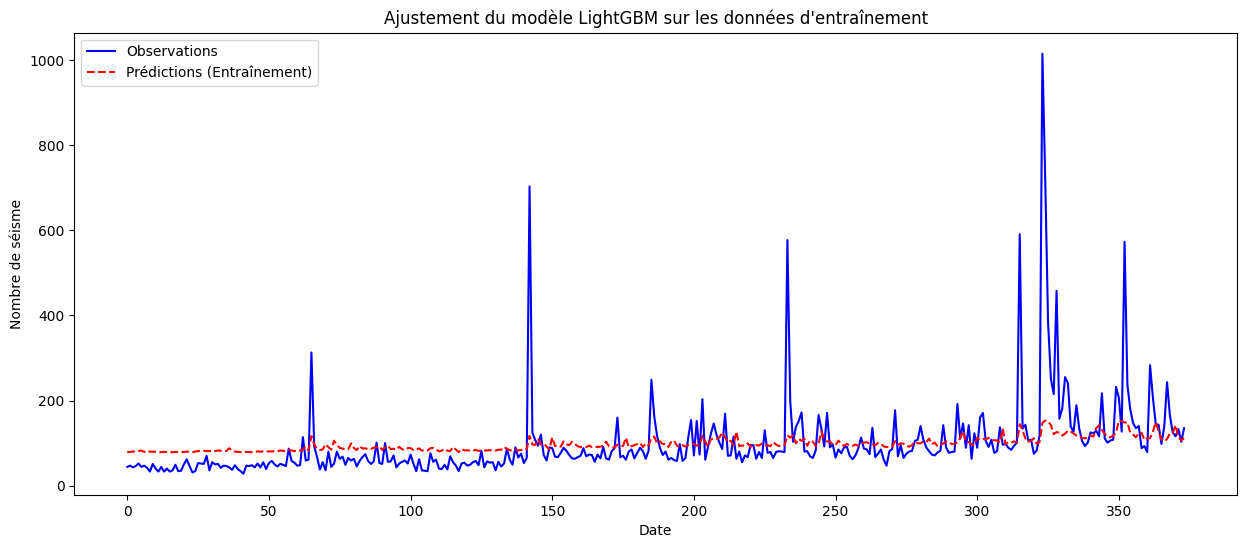

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
# Prédire avec le modèle sur les données d'entraînement
predicted_values_train = bst.predict(X_train)

# Inverser la normalisation pour obtenir les prédictions réelles
predicted_values_train = scaler.inverse_transform(predicted_values_train.reshape(-1, 1))
y_original = scaler.inverse_transform(y_train.reshape(-1, 1))

# Convertir les données en DataFrame
df_train = pd.DataFrame({'Date': range(len(y_original)), 'Observations': y_original.flatten(), 'Predictions': predicted_values_train.flatten()})

# Tracer l'ajustement du modèle avec Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Observations', data=df_train, label='Observations', color='blue')
sns.lineplot(x='Date', y='Predictions', data=df_train, label='Prédictions (Entraînement)', color='red', linestyle='dashed')
plt.title('Ajustement du modèle LightGBM sur les données d\'entraînement')
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.legend()
plt.savefig('ajustement_modele_gbm.png')
plt.show()

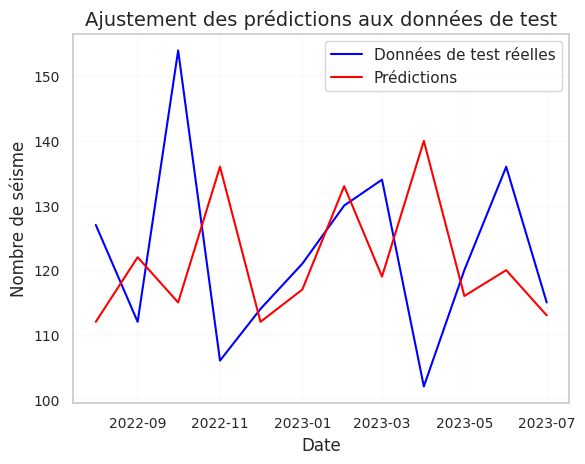

In [57]:
import matplotlib.pyplot as plt

data_test['year_month'] = pd.to_datetime(data_test['year_month'])


# Utiliser un style personnalisé pour ressembler à Plotly
sns.set_theme(style="whitegrid", rc={"grid.linewidth": 0.1, 'axes.labelsize': 12, 'axes.titlesize': 14, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

# Tracer les données de test réelles
plt.plot(data_test["year_month"], y_test_actual, label='Données de test réelles', color='blue')

# Tracer les prédictions
plt.plot(data_test["year_month"], predictions, label='Prédictions', color='red')

# Ajouter des labels et une légende
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.title('Ajustement des prédictions aux données de test')
plt.savefig('Prev_lightgbm.png')
plt.legend()

# Afficher le graphique
plt.show()